# Benchmarking analysis of results of Reproducing Critical Assessment of Metagenome Interpretation assembly challenge on marine dataset with Galaxy

Master Project: Reproducing Critical Assessment of Metagenome Interpretation assembly challenge on marine dataset with Galaxy, including tool updates and benchmarking analysis of results

## **General metrics** and **Computational metrics** Galaxy vs. CAMI2
**Purpose of this jupyter notebook:** 
- Analyze general metrics of reproduced CAMI2 assembly challenge in Galaxy
- Analyze job metrics of reproduced CAMI2 assembly challenge in Galaxy

## General metrics for co-assembly from Galaxy

In [ ]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D

In [156]:
#Create a single dataframe of general metrics for all assembly tools

co_flye_df = pd.read_csv("data/galaxy-data/co-flye.tabular", sep='\t')
co_megahit_def_df = pd.read_csv("data/galaxy-data/co-megahit-default.tabular", sep='\t')
co_megahit_ks10_df = pd.read_csv("data/galaxy-data/co-megahit-ks10.tabular", sep='\t')
co_megahit_ks12_df = pd.read_csv("data/galaxy-data/co-megahit-ks12.tabular", sep='\t')
co_abyss_k41_df = (pd.read_csv("data/galaxy-data/co-abyss-k41.tabular", sep='\t')
                    # remove last column
                      .drop(['CAMI2_Abyss_v234_k41_-_scaffolds'], axis=1))
co_abyss_k96_df = (pd.read_csv("data/galaxy-data/co-abyss-k96.tabular", sep='\t')
                    # remove last column
                      .drop(['CAMI2_Abyss_v234_k96_-_scaffolds'], axis=1))

merged1_df = pd.merge(left=co_flye_df, right=co_megahit_def_df, left_on='Assembly', right_on='Assembly')
merged2_df = pd.merge(left=co_megahit_ks10_df, right=co_megahit_ks12_df, left_on='Assembly', right_on='Assembly')
merged3_df = pd.merge(left=co_abyss_k41_df, right=co_abyss_k96_df, left_on='Assembly', right_on='Assembly')

merged1_df = (merged1_df
            # rename columns
              .rename(columns = {'Assembly': 'metric',
                         'metaflye-v29-nanoraw-long-reads-consensus': 'flye',
                         'megahit-v129-default-short-reads-assembly': 'megahit-default'}))
merged2_df = (merged2_df
            # rename columns
              .rename(columns = {'Assembly': 'metric',
                         'megahit-v129-k-step10-short-reads-assembly': 'megahit-ks10',
                         'megahit-v129-k-step12-short-reads-assembly': 'megahit-ks12'}))
merged3_df = (merged3_df
            # rename columns
              .rename(columns = {'Assembly': 'metric',
                         'CAMI2_Abyss_v234_k41_-_contigs': 'abyss-k41',
                         'CAMI2_Abyss_v234_k96_-_contigs': 'abyss-k96'}))

merged_df = pd.merge(left=merged1_df, right=merged2_df, left_on='metric', right_on='metric')
df = pd.merge(left=merged_df, right=merged3_df, left_on='metric', right_on='metric')
df = df.drop([19, 20])
df.to_csv('data/galaxy-data/general_metrics.tabular', index=False)
df

,metric,flye,megahit-default,megahit-ks10,megahit-ks12,abyss-k41,abyss-k96
0,# contigs (>= 0 bp),327754,1173522,1418476,720710,3296256,237305
1,# contigs (>= 1000 bp),322237,274553,276125,161515,84980,28542
2,Total length (>= 0 bp),1665076386,1543487975,1596388859,932000583,714588082,173183672
3,Total length (>= 1000 bp),1661147500,1068550599,1058447344,661684525,384039049,117127021
4,# contigs,327724,693807,670318,361592,175033,51870
5,Largest contig,160549,1394140,851811,644239,187087,1523356
6,Total length,1665062400,1356097319,1329739480,804193119,446475402,133398599
7,Reference length,48560913,52753808,39040805,82363804,66126875,64021047
8,N50,5517,3854,3874,5115,6948,5158
9,N75,4367,1147,1184,1342,1735,1818


In [162]:
df_list = df.values.tolist()
df_data = (df
            # remove last column
              .drop(['metric'], axis=1))
df_data_list = df_data.values.tolist()
#df_data_list[8]

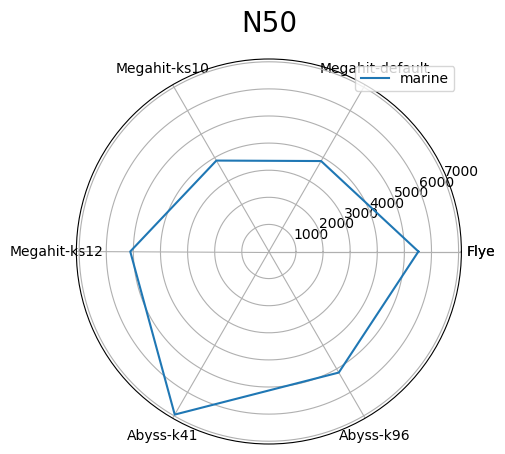

In [163]:
#Create plot for N50 metric

categories = ['Flye', 'Megahit-default', 'Megahit-ks10', 'Megahit-ks12', 'Abyss-k41', 'Abyss-k96']
categories = [*categories, categories[0]]

marine = [float(i) for i in df_data_list[8]]
marine = [*marine, marine[0]]

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(marine))

plt.figure(figsize=(5, 5))
plt.subplot(polar=True)
plt.plot(label_loc, marine, label='marine')
plt.title('N50', size=20)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend()
plt.show()

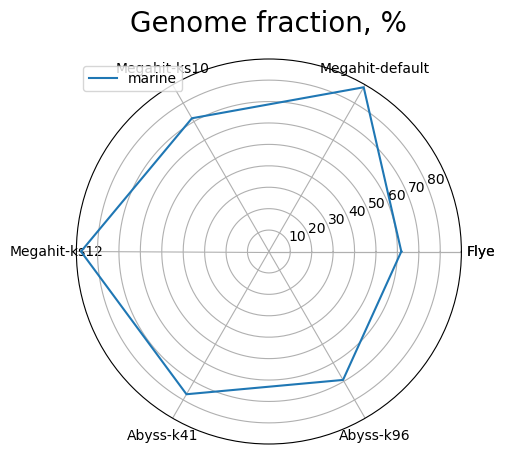

In [164]:
#Create plot for Genome fraction metric

categories = ['Flye', 'Megahit-default', 'Megahit-ks10', 'Megahit-ks12', 'Abyss-k41', 'Abyss-k96']
categories = [*categories, categories[0]]

marine_gf = [float(i) for i in df_data_list[19]]
marine_gf = [*marine_gf, marine_gf[0]]

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(marine_gf))

plt.figure(figsize=(5, 5))
plt.subplot(polar=True)
plt.plot(label_loc, marine_gf, label='marine')
plt.title('Genome fraction, %', size=20)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend()
plt.show()

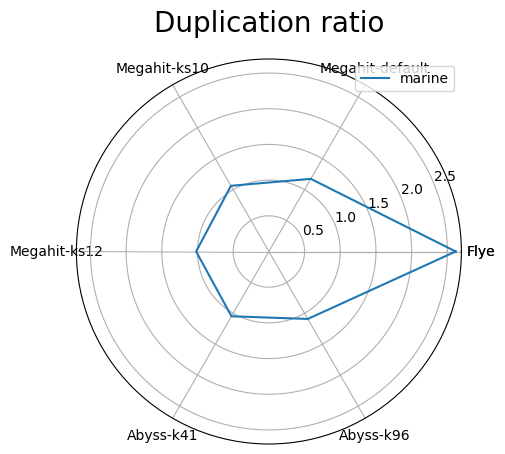

In [165]:
#Create plot for Duplication retio metric

categories = ['Flye', 'Megahit-default', 'Megahit-ks10', 'Megahit-ks12', 'Abyss-k41', 'Abyss-k96']
categories = [*categories, categories[0]]

marine_gf = [float(i) for i in df_data_list[20]]
marine_gf = [*marine_gf, marine_gf[0]]

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(marine_gf))

plt.figure(figsize=(5, 5))
plt.subplot(polar=True)
plt.plot(label_loc, marine_gf, label='marine')
plt.title('Duplication ratio', size=20)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend()
plt.show()

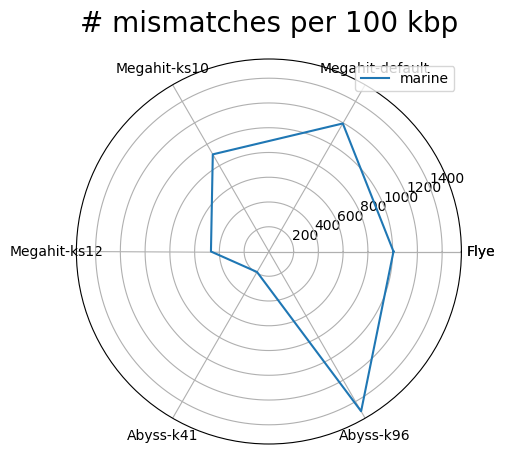

In [166]:
#Create plot for mismatches per 100 kbp metric

categories = ['Flye', 'Megahit-default', 'Megahit-ks10', 'Megahit-ks12', 'Abyss-k41', 'Abyss-k96']
categories = [*categories, categories[0]]

marine_gf = [float(i) for i in df_data_list[22]]
marine_gf = [*marine_gf, marine_gf[0]]

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(marine_gf))

plt.figure(figsize=(5, 5))
plt.subplot(polar=True)
plt.plot(label_loc, marine_gf, label='marine')
plt.title('# mismatches per 100 kbp', size=20)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend()
plt.show()

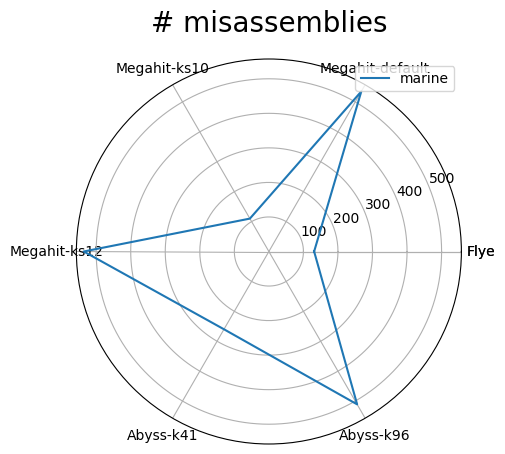

In [167]:
#Create plot for misassemblies metric

categories = ['Flye', 'Megahit-default', 'Megahit-ks10', 'Megahit-ks12', 'Abyss-k41', 'Abyss-k96']
categories = [*categories, categories[0]]

marine_gf = [float(i) for i in df_data_list[12]]
marine_gf = [*marine_gf, marine_gf[0]]

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(marine_gf))

plt.figure(figsize=(5, 5))
plt.subplot(polar=True)
plt.plot(label_loc, marine_gf, label='marine')
plt.title('# misassemblies', size=20)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend()
plt.show()

## Job metrics for co-assembly from Galaxy vs CAMI2

In [168]:
# get data about job metrics from Galaxy and from CAMI2

url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQgJr3J-IyVy9IkXS9W-RZcV83Tr6f7RusG_97QwgpW2dFdCXUMroROIhy8gKjPcUgISFXW9NQwOzzK/pub?gid=1044773206&single=true&output=tsv'
df = pd.read_csv(url, sep='\t')
df

,Assembly tool,CPU time,"Max memory usage, Gb",Runtime (wallclock),CAMI2 Runtime,CAMI2 max memory,tool version used in CAMI2
0,Abyss v2.3.4 k41,127.97,174.8,9.95,63.98,979.27,NaN
1,Abyss v2.3.4 k96,80.78,169.9,7.57,63.98,979.27,2_1_5
2,MEGAHIT v1.2.9,190.43,80.0,40.67,7.07,42.02,NaN
3,MEGAHIT v1.2.9 k21to91 k-step12,108.18,80.0,26.12,7.07,42.02,1_2_7
4,MEGAHIT v1.2.9 k21to91 k-step10,193.57,80.0,40.95,7.07,42.02,NaN


Text(0.5, 0, 'Runtime (hours)')

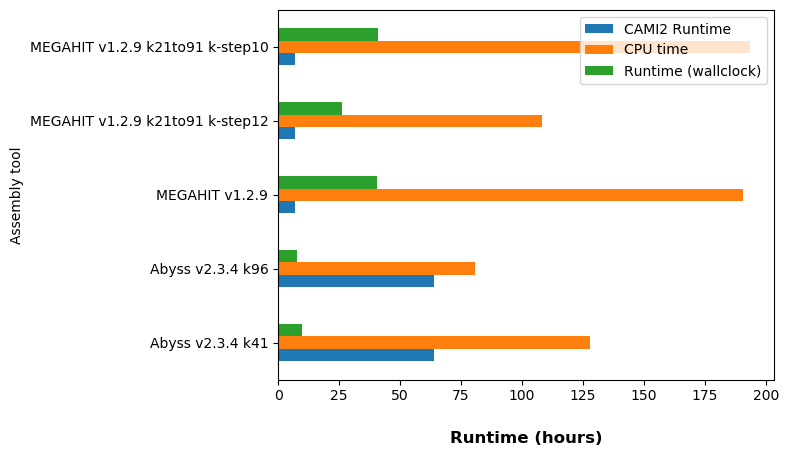

In [169]:
# plotting graph for runtime

rt = df.plot(x="Assembly tool", y=["CAMI2 Runtime", "CPU time", "Runtime (wallclock)"], kind="barh")
rt.set_xlabel("Runtime (hours)", labelpad=20, weight='bold', size=12)

Text(0.5, 0, 'Gb')

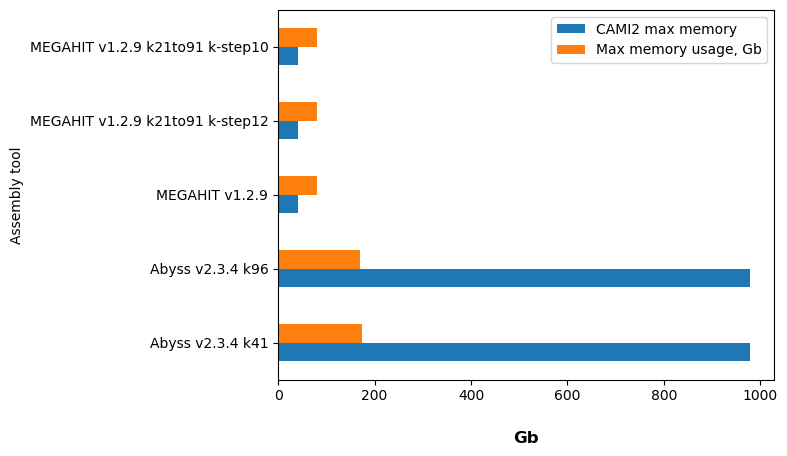

In [170]:
# plotting graph for maximum memory usage

rt = df.plot(x="Assembly tool", y=["CAMI2 max memory", "Max memory usage, Gb"], kind="barh")
rt.set_xlabel("Gb", labelpad=20, weight='bold', size=12)